In [1]:
import glob
import pandas as pd
import numpy as np
import skimage.io
import cv2
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

house_dict = {'Ravenclaw': 'https://vignette.wikia.nocookie.net/pottermore/images/4/40/Ravenclaw_Crest_1.png',
              'Slytherin': 'https://vignette.wikia.nocookie.net/harrypotter/images/0/00/Slytherin_ClearBG.png',
              'Hufflepuff': 'https://vignette.wikia.nocookie.net/harrypotter/images/0/06/Hufflepuff_ClearBG.png',
              'Gryffindor': 'https://vignette.wikia.nocookie.net/harrypotter/images/b/b1/Gryffindor_ClearBG.png'}

search_terms = ['Ravenclaw', 'Slytherin', 'Hufflepuff', 'Gryffindor']
image_path = 'https://vignette.wikia.nocookie.net/pottermore/images/4/40/Ravenclaw_Crest_1.png'
csv_paths = glob.glob('data/parsed_books/*')

In [27]:
def hp_wordcloud(search_term, image_path):
    text_list = []
    search_dfs = []
    for csv_path in csv_paths:
        df = pd.read_csv(csv_path)
        df = df.dropna()

        search_filter = df['sentence'].str.contains(search_term, case=False)
        search_df = df[search_filter]
        search_dfs.append(search_df)
        text_list.extend(search_df['sentence'])

    text = '\n'.join(text_list)

    mask = skimage.io.imread(image_path)
    mask[np.where(mask[:, :, 3] == 0)] = 255
    color_gen = wordcloud.ImageColorGenerator(mask)

    search_wordcloud = wordcloud.WordCloud(background_color='rgba(255, 255, 255, 0)', 
                                           mode='RGBA',
                                           mask=mask, 
                                           max_words=2000,
                                           collocations=False)
    search_wordcloud = search_wordcloud.generate(text)
    search_wordcloud = search_wordcloud.recolor(color_func=color_gen)

    plt.figure(figsize=(20, 20))
    plt.imshow(search_wordcloud, interpolation="bilinear")
    plt.axis("off")
    output_file = f'wordclouds/{search_term}.png'
    plt.savefig(output_file)
    plt.show()
    
    return pd.concat(search_dfs), output_file

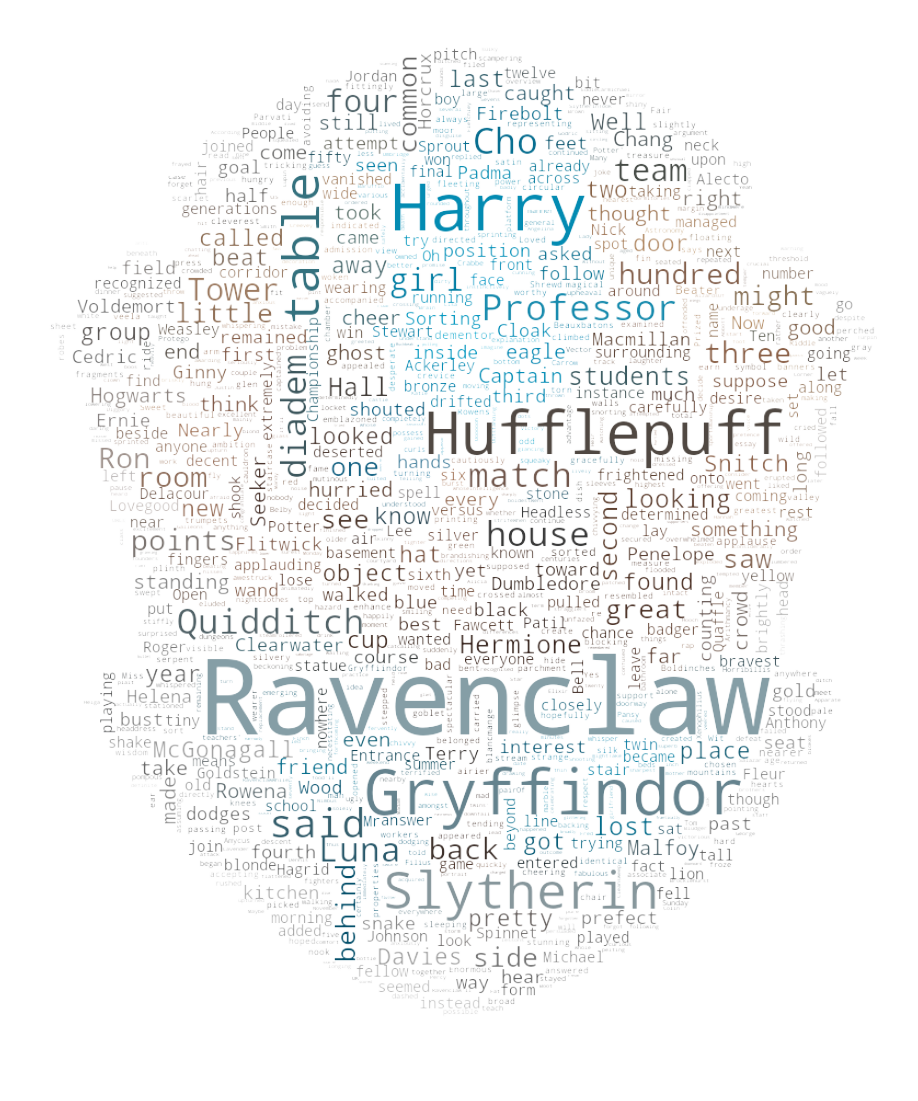

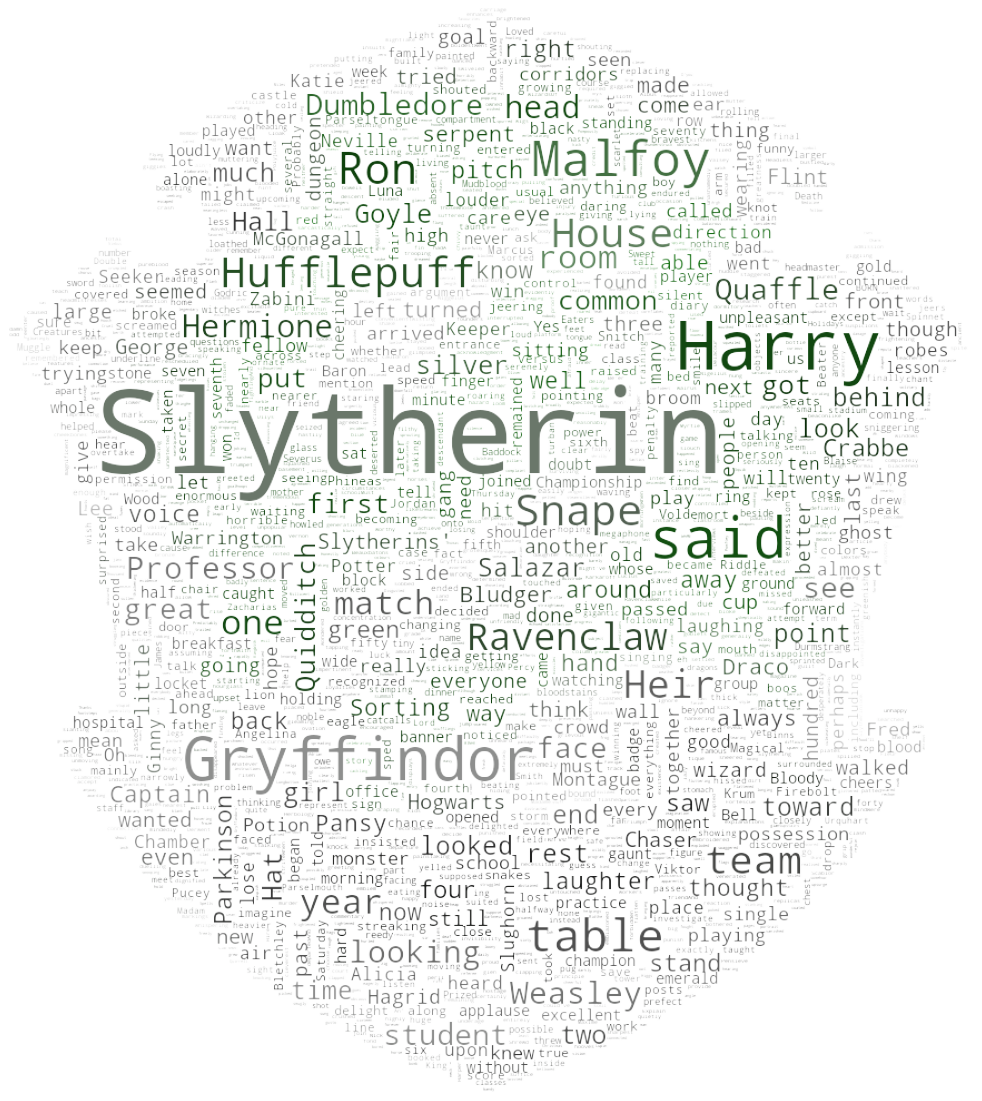

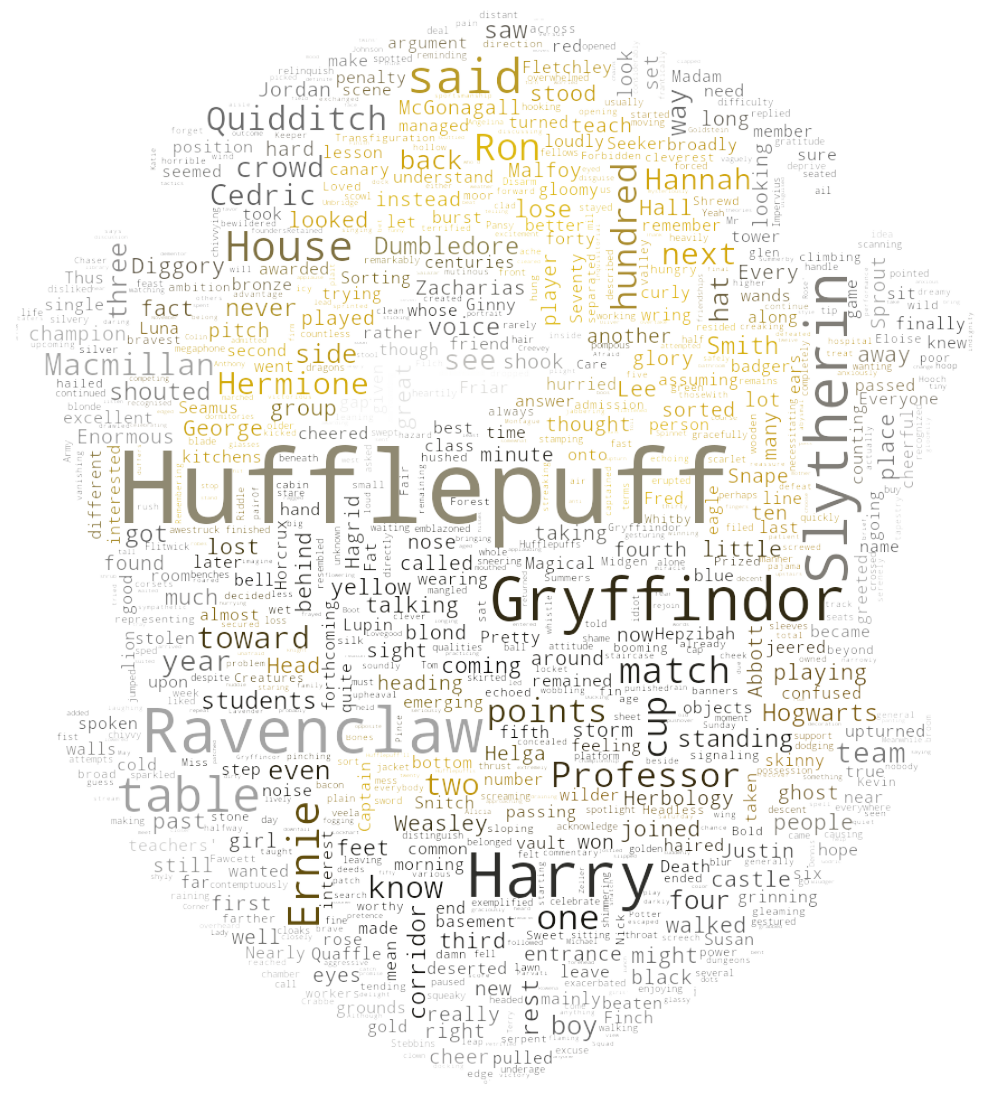

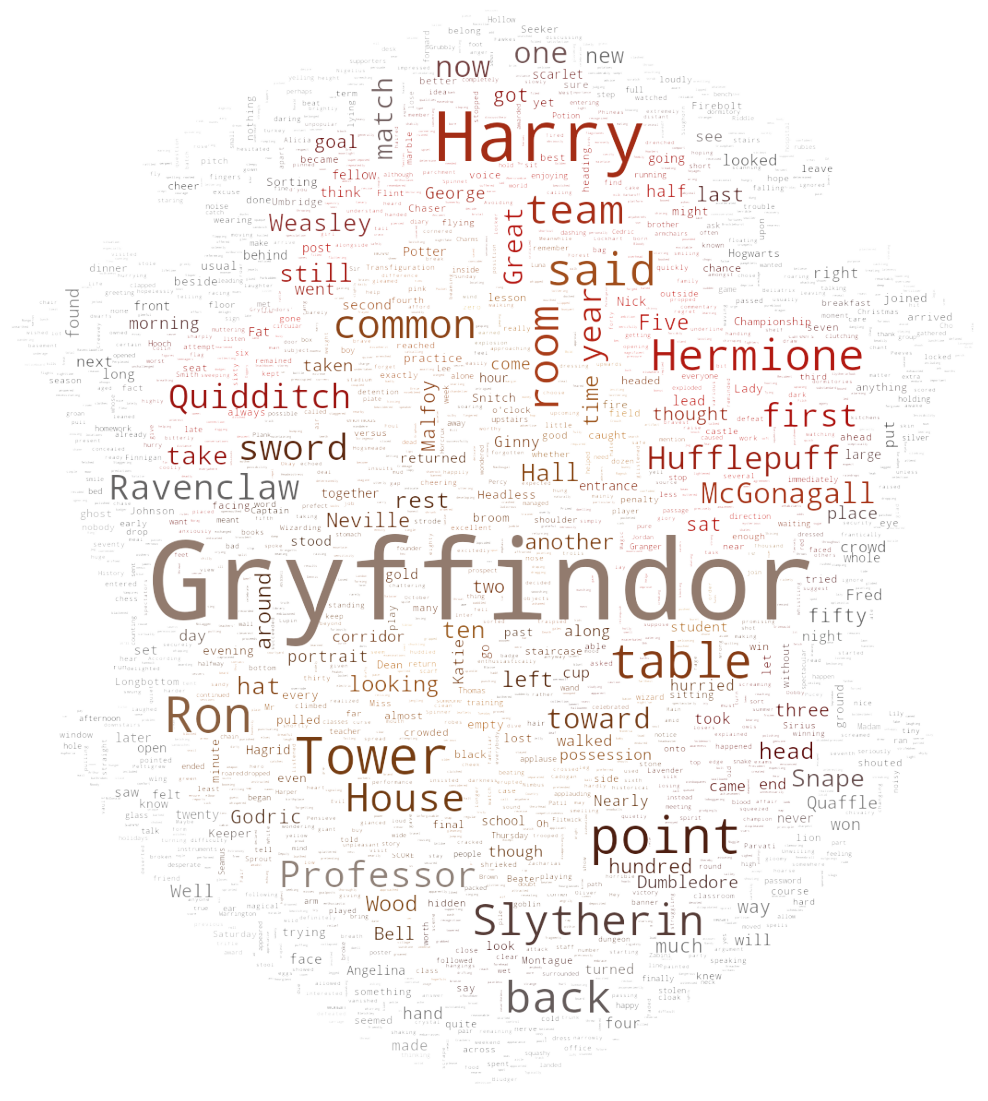

In [28]:
output_files = []
for term, image in house_dict.items():
    _, output = hp_wordcloud(term, image)
    output_files.append(output)